---
---

<h1><center><ins>Numerical methods: exam 2</ins></center></h1>
<h2><center>28th of of January, 9:45-11:15<br><br>

---
---

## Exercise 1 (9 points) - DSMC:

Using the **DSMC method**, calculate the surface area of an ellipse with the semi-major axis $a$ and the semi-minor axis $b$.


**Approach:**
In order to do this, create a 2-dimensional domain (defined by the coordinates $a, b$) and launch a number P of particles at random locations within. Check which particles lie inside the ellipse using the following condition:

$$\frac{x^2}{a^2} + \frac{y^2}{b^2} \le 1$$


**a)** Estimate the surface area of the ellipse as the ratio between the surface area of the whole domain and the ellise by checking the number of particles generated within and outside the ellipse. Stop the calculation once you have reached the precision level of 1 per cent compared to the analytical estimate. 

**b)** Print the surface area. Compare to the analytically computed surface area for the ellipse and show that you have reached the desired precision level. Print the number of particles you've needed to reach this precision.

**c)** Make a scatter plot for your domain, highlighting the particles that are inside the ellipse.

Estimated area: 18.72000
Analytical area: 18.84956
Relative error: 0.687%
Number of particles used: 100


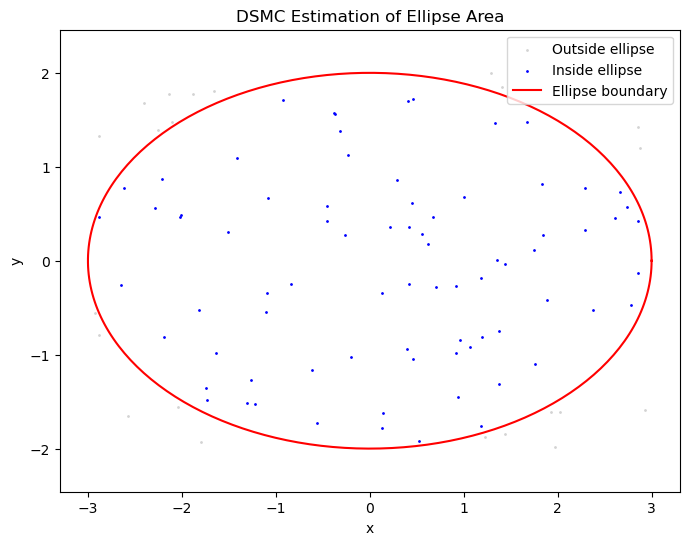

In [7]:
import numpy as np
import matplotlib.pyplot as plt

#define  parameters
a = 3.0  #semi-major axis
b = 2.0  #semi-minor axis

#analytical area
A_ellipse = np.pi * a * b

#domain
domain_area = 4 * a * b

#monte carlo sampling
np.random.seed(0)
N_in = 0
N_total = 0
precision = 0.01  
max_particles = int(1e7)
x_in, y_in = [], []
x_out, y_out = [], []

while True:
    x = np.random.uniform(-a, a)
    y = np.random.uniform(-b, b)
    N_total += 1
    if (x**2 / a**2 + y**2 / b**2) <= 1:
        N_in += 1
        x_in.append(x)
        y_in.append(y)
    else:
        x_out.append(x)
        y_out.append(y)
    if N_total % 100 == 0 or N_total == 1:
        A_est = (N_in / N_total) * domain_area
        rel_error = abs(A_est - A_ellipse) / A_ellipse
        if rel_error < precision or N_total >= max_particles:
            break


print(f"Estimated area: {A_est:.5f}")
print(f"Analytical area: {A_ellipse:.5f}")
print(f"Relative error: {rel_error*100:.3f}%")
print(f"Number of particles used: {N_total}")

#scatter plot
plt.figure(figsize=(8,6))
plt.scatter(x_out, y_out, s=1, color='lightgray', label='Outside ellipse')
plt.scatter(x_in, y_in, s=1, color='blue', label='Inside ellipse')
theta = np.linspace(0, 2*np.pi, 300)
plt.plot(a*np.cos(theta), b*np.sin(theta), 'r', label='Ellipse boundary')
plt.xlabel('x')
plt.ylabel('y')
plt.title('DSMC Estimation of Ellipse Area')
plt.legend()
plt.axis('equal')
plt.show()

## Exercise 2 (9 points) - fitting models to a dataset:

On moodle together with the exam files, you can find the file titled ```Trajectory.txt```. The dataset presents a mock measured trajectory of a particle. Your aim is to determine using the fitting methods if the data corresponds to the particle moving with a constant velocity or if there was an additional acceleration present.

**(A)** Load the dataset into your programme. Skip the caption.

**(B)** Using the embedded functions linregress and curve_fit, fit a straight line and a parabola to the dataset. Which fit corresponds to the motion with a constant velocity, and which fit describes accelerated motion?

**(C)** Output the $\chi^2$ for the first and second fit. Which model fits the dataset better?


In [8]:
from scipy.stats import linregress
from scipy.optimize import curve_fit

#load dataset 
data = []
with open("/Users/sebastianbosnjak/Desktop/Trajectory.txt", 'r') as f:
    for line in f:
        if line.startswith('#') or line.strip() == '':      #skip caption
            continue
        t, x = map(float, line.strip().split())
        data.append((t, x))
data = np.array(data)
t = data[:, 0]
x = data[:, 1]

# (B) Fit straight line (constant velocity)
slope, intercept, _, _, _ = linregress(t, x)
x_fit_lin = slope * t + intercept

# Fit parabola (accelerated motion)
def parabola(t, a, v, x0):
    return a * t**2 + v * t + x0

popt, _ = curve_fit(parabola, t, x)
x_fit_par = parabola(t, *popt)

# (C) Compute chi^2 for both fits
chi2_lin = np.sum((x - x_fit_lin)**2)
chi2_par = np.sum((x - x_fit_par)**2)

print(f"Straight line fit (constant velocity): chi^2 = {chi2_lin:.2f}")
print(f"Parabola fit (acceleration): chi^2 = {chi2_par:.2f}")

if chi2_lin < chi2_par:
    print("The straight line fits better.")
else:
    print("The parabola fits better.")

print("\nWhich fit corresponds to which motion?")
print("Straight line: constant velocity")
print("Parabola: accelerated motion")

Straight line fit (constant velocity): chi^2 = 1095.10
Parabola fit (acceleration): chi^2 = 367.77
The parabola fits better.

Which fit corresponds to which motion?
Straight line: constant velocity
Parabola: accelerated motion
